In [1]:
# check the current python version, make sure this is the one that with HDDM correctly installed
import sys
sys.executable

'C:\\Users\\kalai\\Anaconda2\\python.exe'

In [2]:
%matplotlib inline
# Preparation
import os, hddm, time, csv
import datetime

# import the toolbox
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

# set the color of plots
from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler(color='bgrcmykw')

C:\Users\kalai\Anaconda2\lib\site-packages\IPython\parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [3]:
# load data from cateogriztion based on moral valence
dat_M_match = hddm.load_csv('coke_chn_hddm.csv')

dat_M_match.head(100)  

,subj_idx,Age,Name,Sex,SubTrial,Label,Brand,YesNoResp,Procedure[Block],response,match,stim,fans,rt,cong
0,96,19,helang,male,50,friend,pepsi,No,unmatchProc,1,unmatch,0,pepei_fans,0.200,cong
1,96,19,helang,male,24,friend,circle,Yes,unmatchProc,1,match,1,pepei_fans,0.201,cong
2,96,19,helang,male,32,self,pepsi,Yes,unmatchProc,0,match,1,pepei_fans,0.206,cong
3,96,19,helang,male,39,friend,coca,No,unmatchProc,1,unmatch,0,pepei_fans,0.208,cong
4,96,19,helang,male,53,stranger,coca,Yes,unmatchProc,1,match,1,pepei_fans,0.209,cong
5,96,19,helang,male,39,self,pepsi,Yes,unmatchProc,1,match,1,pepei_fans,0.210,cong
6,96,19,helang,male,34,self,pepsi,Yes,unmatchProc,1,match,1,pepei_fans,0.211,cong
7,96,19,helang,male,42,stranger,pepsi,No,unmatchProc,1,unmatch,0,pepei_fans,0.214,cong
8,96,19,helang,male,52,friend,pepsi,No,unmatchProc,1,unmatch,0,pepei_fans,0.217,cong
9,96,19,helang,male,37,friend,coca,No,unmatchProc,1,unmatch,0,pepei_fans,0.217,cong


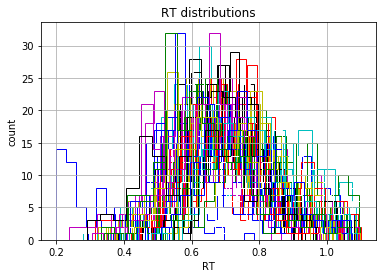

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in dat_M_match.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
plt.savefig('distribution.pdf')

In [5]:
nsample = 10000  # number of sampling
nburn   = 1000     # number of burn

# dateToday = str(date.today())  # replace the code below if you prefer using the actual date
dateToday = 'final' # using final in the saved file name

#### Model 1

In [6]:
start_time = time.time()  # the start time of the processing
 
import warnings           # suppress the warnings
warnings.simplefilter('ignore')

dbname = "M_match_m1_" 
M_match_m1 = hddm.HDDMStimCoding(dat_M_match, 
                                    include=('z'), 
                                    stim_col='stim', 
                                    depends_on={'v':['Label','cong','match'],'t':['Label','cong','match']},
                                    split_param='v', 
                                    drift_criterion=False,
                                    p_outlier=0.05)
                            

M_match_m1.find_starting_values()
M_match_m1.sample(nsample, burn=nburn, dbname=dbname+ '.db', db='pickle')
   
# save the model
M_match_m1.save(dbname)
print("M_match_m1_selfie DIC: %f" %M_match_m1.dic) # DIC: -6555.170198

 [-----------------100%-----------------] 10001 of 10000 complete in 23209.1 secM_match_m1_selfie DIC: -6555.170198


In [7]:
subj_data=M_match_m1.get_subj_nodes()
subj_data.to_csv('coke1.csv')

In [ ]:
ppc_data_match_m1 = hddm.utils.post_pred_gen(M_match_m1)
ppc_compare_match_m1 = hddm.utils.post_pred_stats(dat_M_match, ppc_data_match_m1)  # MSE 
ppc_compare_match_m1.to_csv('ppc_compare_match_m1_thumb.csv', sep = ',')
hddm.analyze.plot_posterior_nodes([t_SelfCongMatch])

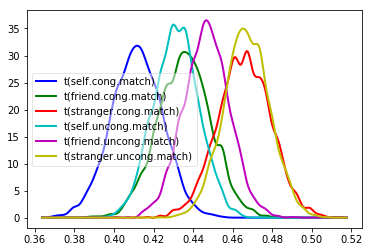

In [37]:
t_SelfCongMatch,t_FriendCongMatch,t_StrangerCong,t_SelfinCongMatch,t_FriendinCongMatch,t_StrangerinCong=M_match_m1.nodes_db.node[['t(self.cong.match)','t(friend.cong.match)','t(stranger.cong.match)','t(self.uncong.match)','t(friend.uncong.match)','t(stranger.uncong.match)']]
hddm.analyze.plot_posterior_nodes([t_SelfCongMatch,t_FriendCongMatch,t_StrangerCongMatch,t_SelfinCongMatch,t_FriendinCongMatch,t_StrangerinCong])

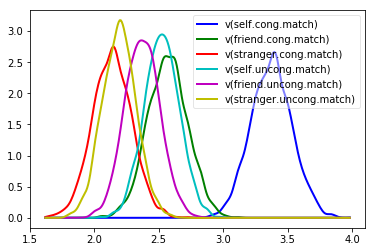

In [38]:
v_SelfCongMatch,v_FriendCongMatch,v_StrangerCongMatch,v_SelfinCongMatch,v_FriendinCongMatch,v_StrangerinCong=M_match_m1.nodes_db.node[['v(self.cong.match)','v(friend.cong.match)','v(stranger.cong.match)','v(self.uncong.match)','v(friend.uncong.match)','v(stranger.uncong.match)']]
hddm.analyze.plot_posterior_nodes([v_SelfCongMatch,v_FriendCongMatch,v_StrangerCongMatch,v_SelfinCongMatch,v_FriendinCongMatch,v_StrangerinCong])

#### Model 2

In [8]:
dbname = "M_match_m2_" 
M_match_m2 = hddm.HDDMStimCoding(dat_M_match, 
                                    include=('z'), 
                                    stim_col='stim', 
                                    depends_on={'v':['Brand','cong','match'],'t':['Brand','cong','match']},
                                    split_param='v', 
                                    drift_criterion=False,
                                    p_outlier=0.05)
                            

M_match_m2.find_starting_values()
M_match_m2.sample(nsample, burn=nburn, dbname=dbname+ '.db', db='pickle')
   
# save the model
M_match_m2.save(dbname)
print("M_match_m2_selfie DIC: %f" %M_match_m2.dic) #DIC: -6544.182629

 [-----------------100%-----------------] 10001 of 10000 complete in 25958.6 secM_match_m2_selfie DIC: -6544.182629


In [9]:
subj_data=M_match_m2.get_subj_nodes()
subj_data.to_csv('coke2.csv')

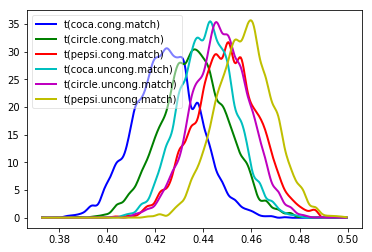

In [39]:
t_CocaCongMatch,t_NullCongMatch,t_PepsiStrangerCong,t_CocainCongMatch,t_NullinCongMatch,t_PepsiinCong=M_match_m2.nodes_db.node[['t(coca.cong.match)','t(circle.cong.match)','t(pepsi.cong.match)','t(coca.uncong.match)','t(circle.uncong.match)','t(pepsi.uncong.match)']]
hddm.analyze.plot_posterior_nodes([t_CocaCongMatch,t_NullCongMatch,t_PepsiStrangerCong,t_CocainCongMatch,t_NullinCongMatch,t_PepsiinCong])

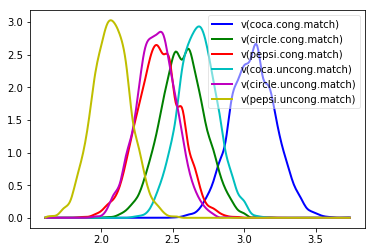

In [41]:
v_CocaCongMatch,v_NullCongMatch,v_PepsiStrangerCong,v_CocainCongMatch,v_NullinCongMatch,v_PepsiinCong=M_match_m2.nodes_db.node[['v(coca.cong.match)','v(circle.cong.match)','v(pepsi.cong.match)','v(coca.uncong.match)','v(circle.uncong.match)','v(pepsi.uncong.match)']]
hddm.analyze.plot_posterior_nodes([v_CocaCongMatch,v_NullCongMatch,v_PepsiStrangerCong,v_CocainCongMatch,v_NullinCongMatch,v_PepsiinCong])

In [ ]:
ppc_data_match_m2 = hddm.utils.post_pred_gen(M_match_m2)
ppc_compare_match_m2 = hddm.utils.post_pred_stats(dat_M_match, ppc_data_match_m2)  # MSE 
ppc_compare_match_m2.to_csv('ppc_compare_match_m2_thumb.csv', sep = ',')

#### Model 3

In [10]:
dbname = "M_match_m3_" 
M_match_m3 = hddm.HDDMStimCoding(dat_M_match, 
                                    include=('z'), 
                                    stim_col='stim', 
                                    depends_on={'v':['Brand','cong','match'],'t':['Brand','cong','match'],'a':['Brand','cong']},
                                    split_param='v', 
                                    drift_criterion=False,
                                    p_outlier=0.05)
                            

M_match_m3.find_starting_values()
M_match_m3.sample(nsample, burn=nburn, dbname=dbname+ '.db', db='pickle')
   
# save the model
M_match_m3.save(dbname)


print("M_match_m3_thumb DIC: %f" %M_match_m3.dic) #DIC: -6575.643769

 [-----------------100%-----------------] 10001 of 10000 complete in 31089.3 secM_match_m3_thumb DIC: -6575.643769


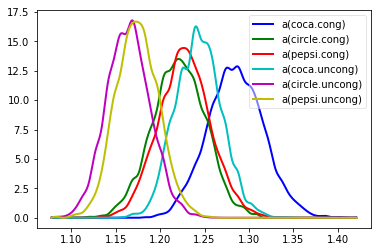

In [51]:
a_CocaCong,a_NullCong,a_PepsiCong,a_CocainCong,a_NullinCong,a_PepsiinCong=M_match_m3.nodes_db.node[['a(coca.cong)','a(circle.cong)','a(pepsi.cong)','a(coca.uncong)','a(circle.uncong)','a(pepsi.uncong)']]
hddm.analyze.plot_posterior_nodes([a_CocaCong,a_NullCong,a_PepsiCong,a_CocainCong,a_NullinCong,a_PepsiinCong])

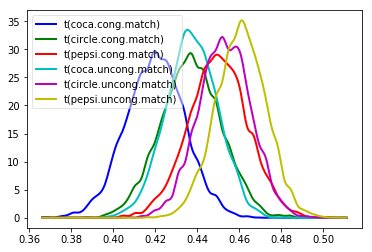

In [43]:
t_CocaCongMatch,t_NullCongMatch,t_PepsiStrangerCong,t_CocainCongMatch,t_NullinCongMatch,t_PepsiinCong=M_match_m3.nodes_db.node[['t(coca.cong.match)','t(circle.cong.match)','t(pepsi.cong.match)','t(coca.uncong.match)','t(circle.uncong.match)','t(pepsi.uncong.match)']]
hddm.analyze.plot_posterior_nodes([t_CocaCongMatch,t_NullCongMatch,t_PepsiStrangerCong,t_CocainCongMatch,t_NullinCongMatch,t_PepsiinCong])

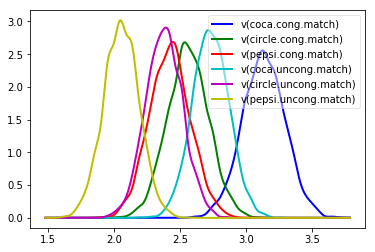

In [44]:
v_CocaCongMatch,v_NullCongMatch,v_PepsiStrangerCong,v_CocainCongMatch,v_NullinCongMatch,v_PepsiinCong=M_match_m3.nodes_db.node[['v(coca.cong.match)','v(circle.cong.match)','v(pepsi.cong.match)','v(coca.uncong.match)','v(circle.uncong.match)','v(pepsi.uncong.match)']]
hddm.analyze.plot_posterior_nodes([v_CocaCongMatch,v_NullCongMatch,v_PepsiStrangerCong,v_CocainCongMatch,v_NullinCongMatch,v_PepsiinCong])

In [11]:
subj_data=M_match_m3.get_subj_nodes()
subj_data.to_csv('coke3.csv')

In [ ]:
ppc_data_match_m3 = hddm.utils.post_pred_gen(M_match_m3)
ppc_compare_match_m3 = hddm.utils.post_pred_stats(dat_M_match, ppc_data_match_m3)  # MSE 
ppc_compare_match_m3.to_csv('ppc_compare_match_m3_thumb.csv', sep = ',')


#### Model 4

In [12]:
dbname = "M_match_m4_" 
M_match_m4 = hddm.HDDMStimCoding(dat_M_match, 
                                    include=('z'), 
                                    stim_col='stim', 
                                    depends_on={'v':['Label','cong','match'],'t':['Label','cong','match'],'a':['Label','cong']},
                                    split_param='v', 
                                    drift_criterion=False,
                                    p_outlier=0.05)
                            

M_match_m4.find_starting_values()
M_match_m4.sample(nsample, burn=nburn, dbname=dbname+ '.db', db='pickle')
   
# save the model
M_match_m4.save(dbname)


print("M_match_m4_thumb DIC: %f" %M_match_m4.dic) #DIC: -6546.193656

 [-----------------100%-----------------] 10001 of 10000 complete in 23095.2 secM_match_m4_thumb DIC: -6546.193656


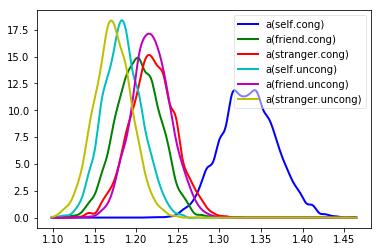

In [59]:
a_SelfCong,a_FriendCong,a_StrangerCong,a_SelfinCong,a_FriendinCong,a_StrangerinCong=M_match_m4.nodes_db.node[['a(self.cong)','a(friend.cong)','a(stranger.cong)','a(self.uncong)','a(friend.uncong)','a(stranger.uncong)']]
hddm.analyze.plot_posterior_nodes([a_SelfCong,a_FriendCong,a_StrangerCong,a_SelfinCong,a_FriendinCong,a_StrangerinCong])

In [13]:
subj_data=M_match_m4.get_subj_nodes()
subj_data.to_csv('coke4.csv')

In [ ]:
ppc_data_match_m4 = hddm.utils.post_pred_gen(M_match_m4)
ppc_compare_match_m4 = hddm.utils.post_pred_stats(dat_M_match, ppc_data_match_m4)  # MSE 
ppc_compare_match_m4.to_csv('ppc_compare_match_m4_thumb.csv', sep = ',')


#### Model 5

In [14]:
dbname = "M_match_m5_" 
M_match_m5 = hddm.HDDMStimCoding(dat_M_match, 
                                    include=('z'), 
                                    stim_col='stim', 
                                    depends_on={'v':['Brand','cong','match'],'t':['Brand','cong','match'],'z':['Brand','cong']},
                                    split_param='v', 
                                    drift_criterion=False,
                                    p_outlier=0.05)
                            

M_match_m5.find_starting_values()
M_match_m5.sample(nsample, burn=nburn, dbname=dbname+ '.db', db='pickle')
   
# save the model
M_match_m5.save(dbname)



print("M_match_m5_thumb DIC: %f" %M_match_m5.dic) # DIC: -6535.112837

 [-----------------100%-----------------] 10001 of 10000 complete in 24365.5 secM_match_m5_thumb DIC: -6535.112837


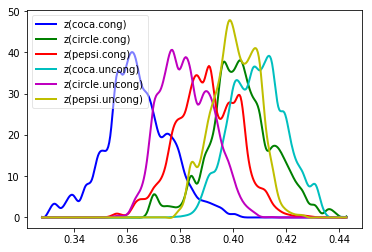

In [60]:
z_CocaCong,z_NullCong,z_PepsiCong,z_CocainCong,z_NullinCong,z_PepsiinCong=M_match_m5.nodes_db.node[['z(coca.cong)','z(circle.cong)','z(pepsi.cong)','z(coca.uncong)','z(circle.uncong)','z(pepsi.uncong)']]
hddm.analyze.plot_posterior_nodes([z_CocaCong,z_NullCong,z_PepsiCong,z_CocainCong,z_NullinCong,z_PepsiinCong])

In [15]:
subj_data=M_match_m5.get_subj_nodes()
subj_data.to_csv('coke5.csv')

In [ ]:
ppc_data_match_m5 = hddm.utils.post_pred_gen(M_match_m5)
ppc_compare_match_m5 = hddm.utils.post_pred_stats(dat_M_match, ppc_data_match_m5)  # MSE 
ppc_compare_match_m5.to_csv('ppc_compare_match_m5_thumb.csv', sep = ',')

#### Model 6

In [16]:
dbname = "M_match_m6_" 
M_match_m6 = hddm.HDDMStimCoding(dat_M_match, 
                                    include=('z'), 
                                    stim_col='stim', 
                                    depends_on={'v':['Label','cong','match'],'t':['Label','cong','match'],'z':['Label','cong']},
                                    split_param='v', 
                                    drift_criterion=False,
                                    p_outlier=0.05)
                            

M_match_m6.find_starting_values()
M_match_m6.sample(nsample, burn=nburn, dbname=dbname+ '.db', db='pickle')
   
# save the model
M_match_m6.save(dbname)


print("M_match_m6_thumb DIC: %f" %M_match_m6.dic) #DIC: -6558.187687

 [-----------------100%-----------------] 10001 of 10000 complete in 24608.9 secM_match_m6_thumb DIC: -6558.187687


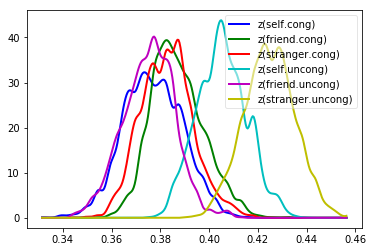

In [61]:
a_SelfCong,a_FriendCong,a_StrangerCong,a_SelfinCong,a_FriendinCong,a_StrangerinCong=M_match_m6.nodes_db.node[['z(self.cong)','z(friend.cong)','z(stranger.cong)','z(self.uncong)','z(friend.uncong)','z(stranger.uncong)']]
hddm.analyze.plot_posterior_nodes([a_SelfCong,a_FriendCong,a_StrangerCong,a_SelfinCong,a_FriendinCong,a_StrangerinCong])

In [17]:
subj_data=M_match_m6.get_subj_nodes()
subj_data.to_csv('coke6.csv')

In [ ]:
ppc_data_match_m6 = hddm.utils.post_pred_gen(M_match_m6)
ppc_compare_match_m6 = hddm.utils.post_pred_stats(dat_M_match, ppc_data_match_m6)  # MSE 
ppc_compare_match_m6.to_csv('ppc_compare_match_m6_thumb.csv', sep = ',')


#### Check the convergence of MCMC

In [7]:
# doing Gelman-Rubin statistic (time consuming)
models_match = []
for i in range(5):
    print('processing Model ', i, '\n')
    m_stim = hddm.HDDMStimCoding(dat_M_match,
                                 include=('z'), 
                                 stim_col='stim',
                                 depends_on={'v':['Label','cong','match'],'t':['Label','cong','match']},
                                 split_param='v',
                                 drift_criterion=False)
    m_stim.find_starting_values()
    m_stim.sample(nsample, burn = nburn)
    models_match.append(m_stim)

Match_R_hat_vtz4 = hddm.analyze.gelman_rubin(models_match)

# save Categ_R_hat_vtz
with open('Match_R_hat_vtz4_stim.csv','w') as f:
    w = csv.writer(f)
    w.writerows(Match_R_hat_vtz4.items())
    
    

('processing Model ', 0, '\n')
 [-----------------100%-----------------] 10001 of 10000 complete in 39568.1 sec('processing Model ', 1, '\n')
 [-----------------100%-----------------] 10001 of 10000 complete in 38485.0 sec('processing Model ', 2, '\n')
 [-----------------100%-----------------] 10001 of 10000 complete in 38071.5 sec('processing Model ', 3, '\n')
 [-----------------100%-----------------] 10001 of 10000 complete in 37496.6 sec('processing Model ', 4, '\n')
 [-----------------100%-----------------] 10001 of 10000 complete in 39121.8 sec